# Influence of different parameters on our DQN


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set(style="darkgrid")

In [47]:
num_setups = 5 # highest among the first number in the file name
num_runs = 7 # how many times we repeat the same setup
mean_window = 20
env = 'Acrovot-v1' # which env we use
# brute force approach to iterate over all experiments
exp = ['LOG.episode_batch.3_Acrobot-v1_AB_75-50-25_2017-06-19-06-53_0.stats.json', ''] # [name1, name2, ..., namen]

In [48]:
#plot one json file

#my_experiment = pd.read_json('LOG.episode_batch.3_Acrobot-v1_AB_75-50-25_2017-06-19-06-53_0.stats.json', orient='columns')
#my_experiment
#rwd = np.array(my_experiment['episode_rewards'].T)
#stp = np.array(my_experiment['episode_lengths'].T)
#avg_rwd = np.array(my_experiment['mean_episode_rewards'].T)
#avg_stp = np.array(my_experiment['mean_episode_lengths'].T)

In [49]:
#iterate over files for one exp

rwd = np.array()
stp = np.array()
avg_rwd = np.array()
avg_stp = np.array(l)
for e in exp:
    my_experiment = pd.read_json(e, orient='columns' )
    rwd_t = np.array(my_experiment['episode_rewards'].T)
    rwd.append(rwd-t)
    stp_t = np.array(my_experiment['episode_lengths'].T)
    stp.append(stp_t)
    avg_rwd_t = np.array(my_experiment['mean_episode_rewards'].T)
    avg_rwd.append(avg_rwd_t)
    avg_stp_t = np.array(my_experiment['mean_episode_lengths'].T)
    avg_stp.append(avg_stp_t)

SyntaxError: can't assign to operator (<ipython-input-49-52fee3e07e44>, line 9)

In [50]:

#calculate exploartionrate
explo_rate = np.zeros(len(rwd)) # use rwd[0] if we iterate over multiple runs
for i in range(len(rwd)):
    # since we habe a linear Schedule for 30 Iterations, assume each episode has 5000steps
    if (i>30):
        explo_rate[i] = 0.1
    else:
        explo_rate[i]= 1 + (i*5000)*(-0.9)/150000
print(explo_rate)

[ 1.    0.97  0.94 ...,  0.1   0.1   0.1 ]


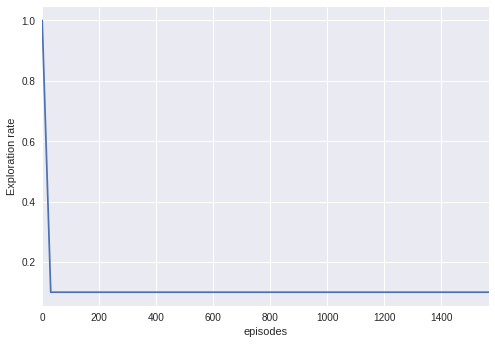

In [39]:
sns.tsplot(data=explo_rate)
plt.ylabel('Exploration rate')
plt.xlabel('episodes')

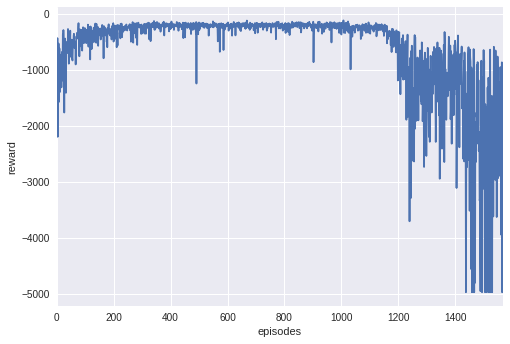

In [40]:
sns.tsplot(data=rwd) #plot reward rwd and explo_rate in ein diagramm wenn moeglich
plt.ylabel('reward')
plt.xlabel('episodes')


In [41]:

f, axes = plt.subplots(nrows=1, 3, figsize=(20,5))
axes = [axes]
for setup in range(num_setups):
    for exp, (name, data) in enumerate(experiments):
        sns.tsplot(data=data[setup,:,:], color=colors[setup], ax=axes[0][exp], value=name)
plt.show()


SyntaxError: positional argument follows keyword argument (<ipython-input-41-c271dfd34369>, line 2)

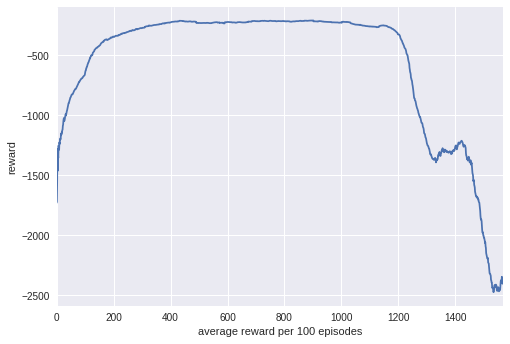

In [42]:
sns.tsplot(data=avg_rwd)
plt.ylabel('reward')
plt.xlabel('average reward per 100 episodes')

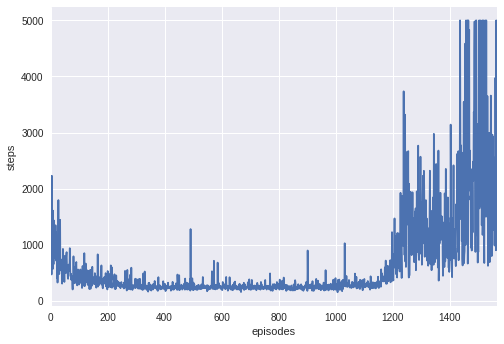

In [43]:
sns.tsplot(data=stp)
plt.ylabel('steps')
plt.xlabel('episodes')

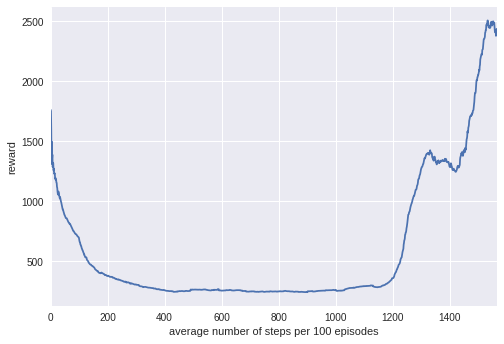

In [44]:
sns.tsplot(data=avg_stp)
plt.ylabel('reward')
plt.xlabel('average number of steps per 100 episodes')